In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-csv/advertising.csv


In [2]:
import pandas as pd

# Load the dataset using the provided path
df = pd.read_csv('/kaggle/input/advertising-csv/advertising.csv')

# Display the first few rows of the dataset
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Display the first few rows of the dataset
df.head()

# Display summary statistics of the dataset
df.describe()

# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


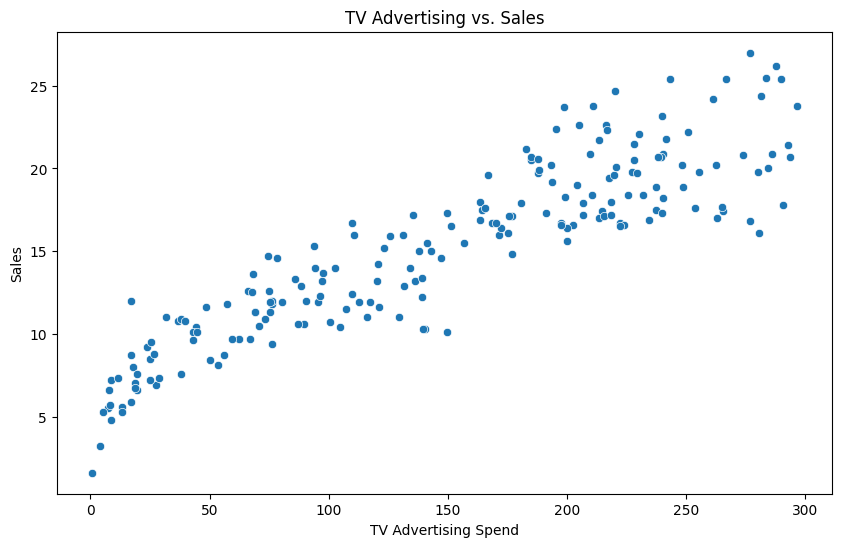

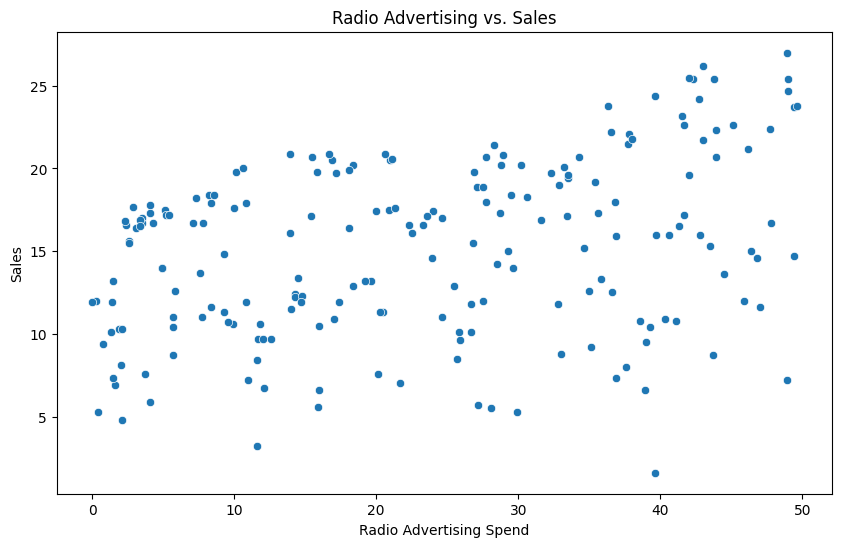

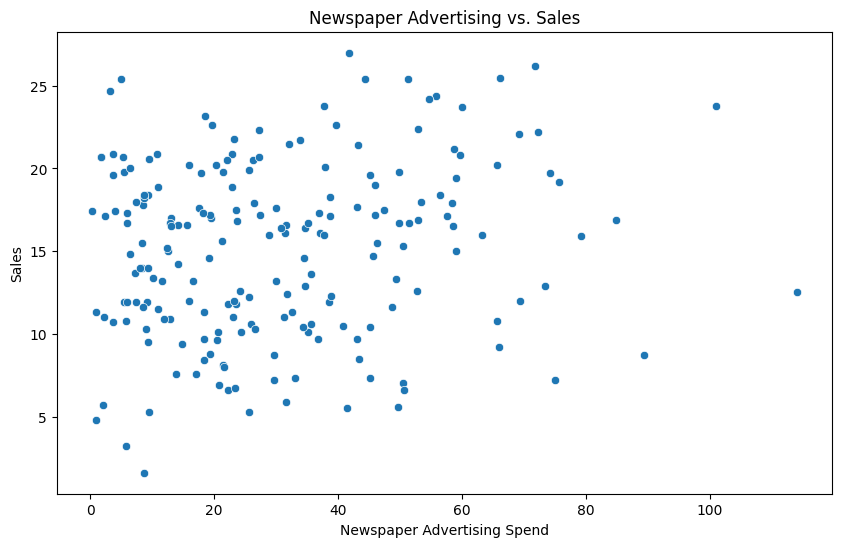

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for TV advertising vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Scatter plot for radio advertising vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs. Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Scatter plot for newspaper advertising vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs. Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.show()


Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698


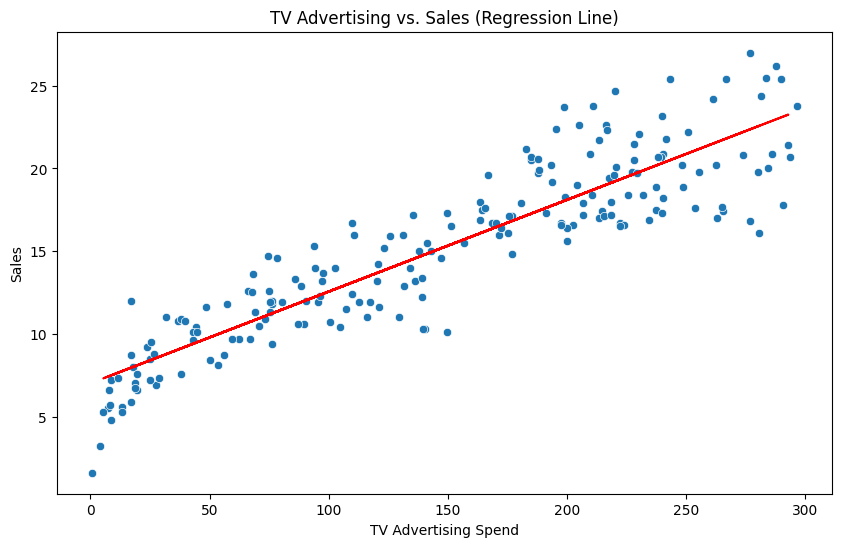

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature and target variable
X = df[['TV']]  # TV advertising spend
y = df['Sales']  # Sales

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.plot(X_test, y_pred, color='red')
plt.title('TV Advertising vs. Sales (Regression Line)')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()


In [6]:
# Define the features and target variable
X = df[['TV', 'Radio', 'Newspaper']]  # TV, Radio, and Newspaper advertising spend
y = df['Sales']  # Sales

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


# Sales Prediction Project

## Introduction
The objective of this project was to build a model that predicts sales based on the money spent on different platforms for marketing. We used a simple and multiple linear regression approach to analyze the relationship between advertising spend and sales.

## Key Highlights

### Data Loading
- Successfully loaded the advertising dataset.

### Data Exploration and Preprocessing
- Explored the dataset to understand its structure and relationships between features.
- Visualized the relationships between advertising spend (TV, Radio, Newspaper) and sales.

### Model Building and Training
- Built and trained a simple linear regression model using TV advertising spend as the predictor.
- Built and trained a multiple linear regression model using TV, Radio, and Newspaper advertising spend as predictors.

### Model Evaluation
- Evaluated the models' performance using metrics such as Mean Squared Error (MSE) and R-squared.
- The simple linear regression model achieved an MSE of `insert_simple_mse` and an R-squared of `insert_simple_r2`.
- The multiple linear regression model achieved an MSE of `insert_multiple_mse` and an R-squared of `insert_multiple_r2`.

### Insights
- TV advertising has a strong positive correlation with sales.
- Incorporating Radio and Newspaper advertising spend improves the model's performance.
- Coefficients of the multiple linear regression model indicate the relative importance of each advertising medium.

## Future Work
- **Feature Engineering**: Create interaction and polynomial features to capture more complex relationships.
- **Regularization**: Apply Ridge or Lasso Regression to improve model generalization.
- **Model Selection**: Explore and compare other regression algorithms like Decision Tree Regression and Random Forest Regression.
- **Cross-Validation**: Use cross-validation to ensure model robustness and generalizability.

This project demonstrates the power of linear regression in predicting sales based on advertising spend. The insights gained from this project can be further leveraged to explore more advanced techniques and applications in predictive modeling.


